In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
dfs = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
csvs = ['sigmoid_no_Cape.csv', 'cape_bin_0.3.csv', 'L1_loss_MC.csv', 'cape_bin_alternate.csv']
titles = ['sigmoid no Cape', 'Cape bin', 'MC', 'Cape bin alternate loss']

for i in range(len(dfs)):
	dfs[i] = pd.read_csv(csvs[i])

In [54]:
brier_scores = []
ECE = []
KL = []
thresholds = [1,5,10,20,50,100,150]
for i in range(len(csvs)):
    brier_scores.append(pd.DataFrame(columns=["mm", "brierScore"]))
    ECE.append(pd.DataFrame(columns=["mm", "ECE"]))
    KL.append(pd.DataFrame(columns=["mm", "KL"]))
    for th in thresholds:
        for d in dfs[i][f"Brier score {th} mm"].to_list():
            brier_scores[i] = pd.concat([brier_scores[i], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
        for d in dfs[i][f"ECE {th} mm"].to_list():
            ECE[i] = pd.concat([ECE[i], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
        for d in dfs[i][f"KL {th} mm"].to_list():
            KL[i] = pd.concat([KL[i], pd.DataFrame([[th, d]], columns=["mm", "KL"])], ignore_index=True)

/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_61088/2195066054.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  brier_scores[i] = pd.concat([brier_scores[i], pd.DataFrame([[th, d]], columns=["mm", "brierScore"])], ignore_index=True)
/var/folders/30/xm8738cn5b3g6707w_6b0w740000gn/T/ipykernel_61088/2195066054.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ECE[i] = pd.concat([ECE[i], pd.DataFrame([[th, d]], columns=["mm", "ECE"])], ignore_index=True)
/var/folders/30/xm8738cn5

Text(0.5, 1.0, 'BRIER SCORE')

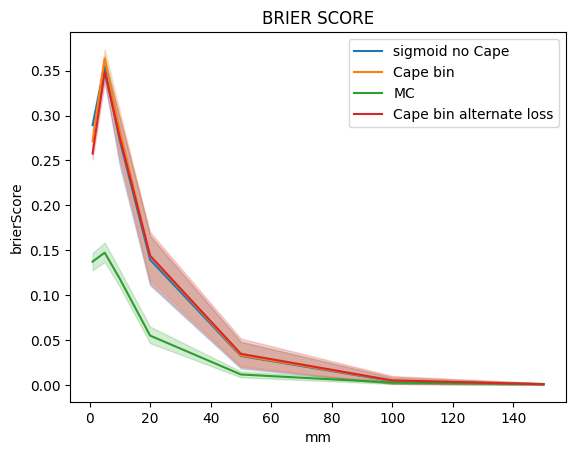

In [55]:
for i in range(len(csvs)):
	sns.lineplot(data=brier_scores[i], x="mm", y="brierScore", label=titles[i])
plt.legend()
plt.title("BRIER SCORE")

Text(0.5, 1.0, 'ECE')

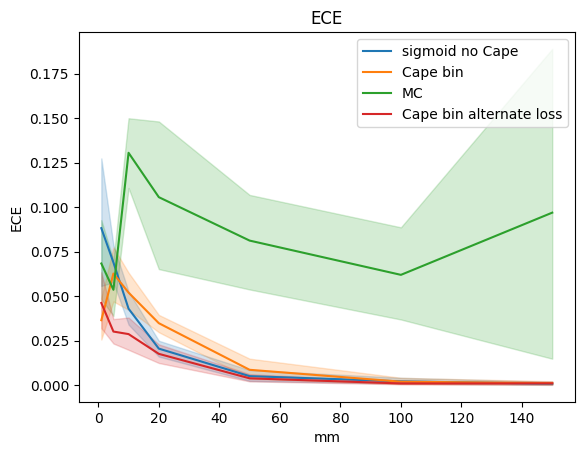

In [56]:
for i in range(len(csvs)):
	sns.lineplot(data=ECE[i], x="mm", y="ECE", label=titles[i])
plt.legend()
plt.title("ECE")

Text(0.5, 1.0, 'KL')

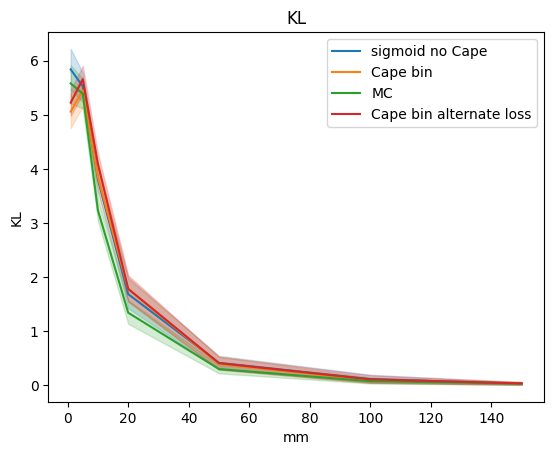

In [57]:
for i in range(len(csvs)):
	sns.lineplot(data=KL[i], x="mm", y="KL", label=titles[i])
plt.legend()
plt.title("KL")

In [58]:
rmse =dfs[2]["test rmse"].to_numpy()
print(f"MC: rmse mean: {np.mean(rmse):.4f},  var: {np.var(rmse):.4f}")

MC: rmse mean: 5.0599,  var: 1.4885
